# Question 1: ANN
- Use MELBOURNE_HOUSE_PRICE dataset (MELBOURNE_HOUSE_PRICES_LESS.csv) to precdict house prices from other features.
- Read more: https://www.kaggle.com/anthonypino/melbourne-housing-market/data
### Requirement:
- Apply ANN to build a model that predicts house prices from the provided features.
- Make new predictions for samples that have no prices in the dataset.

In [49]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
#ignoring the warnings while executing codes
import warnings
warnings.filterwarnings("ignore")

In [50]:
df = pd.read_csv("Melbourne_housing_FULL.csv")
# test_data = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")

In [51]:
df.columns.values

array(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype=object)

In [52]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [53]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [54]:
# Check No missing values
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [55]:
#Clear null values
df.columns.values
df = df.dropna(how='any')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


In [56]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,8887.0,3.098909e+00,0.963786,1.00000,2.00000,3.0000,4.000000e+00,1.200000e+01
Price,8887.0,1.092902e+06,679381.904112,131000.00000,641000.00000,900000.0000,1.345000e+06,9.000000e+06
Distance,8887.0,1.119989e+01,6.813402,0.00000,6.40000,10.2000,1.390000e+01,4.740000e+01
Postcode,8887.0,3.111663e+03,112.614268,3000.00000,3044.00000,3084.0000,3.150000e+03,3.977000e+03
Bedroom2,8887.0,3.078204e+00,0.966269,0.00000,2.00000,3.0000,4.000000e+00,1.200000e+01
Bathroom,8887.0,1.646450e+00,0.721611,1.00000,1.00000,2.0000,2.000000e+00,9.000000e+00
Car,8887.0,1.692247e+00,0.975464,0.00000,1.00000,2.0000,2.000000e+00,1.000000e+01
Landsize,8887.0,5.234804e+02,1061.324228,0.00000,212.00000,478.0000,6.520000e+02,4.280000e+04
BuildingArea,8887.0,1.493095e+02,87.925580,0.00000,100.00000,132.0000,1.800000e+02,3.112000e+03
YearBuilt,8887.0,1.965753e+03,37.040876,1196.00000,1945.00000,1970.0000,2.000000e+03,2.019000e+03


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8887 non-null   object 
 1   Address        8887 non-null   object 
 2   Rooms          8887 non-null   int64  
 3   Type           8887 non-null   object 
 4   Price          8887 non-null   float64
 5   Method         8887 non-null   object 
 6   SellerG        8887 non-null   object 
 7   Date           8887 non-null   object 
 8   Distance       8887 non-null   float64
 9   Postcode       8887 non-null   float64
 10  Bedroom2       8887 non-null   float64
 11  Bathroom       8887 non-null   float64
 12  Car            8887 non-null   float64
 13  Landsize       8887 non-null   float64
 14  BuildingArea   8887 non-null   float64
 15  YearBuilt      8887 non-null   float64
 16  CouncilArea    8887 non-null   object 
 17  Lattitude      8887 non-null   float64
 18  Longtit

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

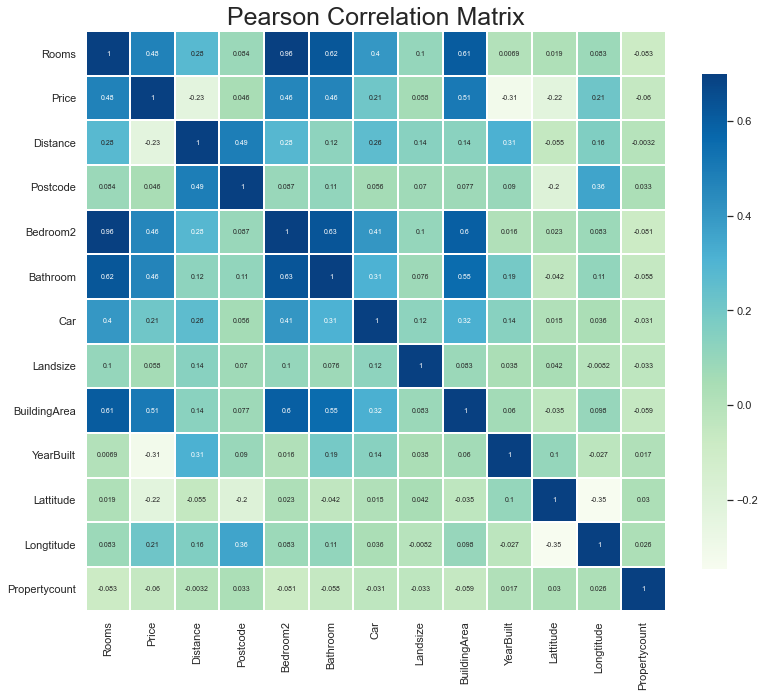

In [58]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [59]:
price_corr = df.corr()['Price'].sort_values(ascending=False)
price_corr

Price            1.000000
BuildingArea     0.507284
Rooms            0.475074
Bathroom         0.463501
Bedroom2         0.460880
Longtitude       0.212174
Car              0.209464
Landsize         0.058375
Postcode         0.046033
Propertycount   -0.059720
Lattitude       -0.224255
Distance        -0.231212
YearBuilt       -0.313664
Name: Price, dtype: float64

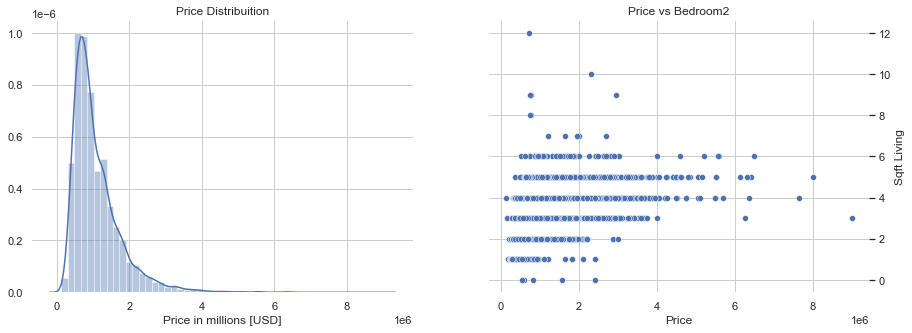

In [60]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(df['Price'], ax=axes[0])
sns.scatterplot(x='Price',y='Bedroom2', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Bedroom2')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

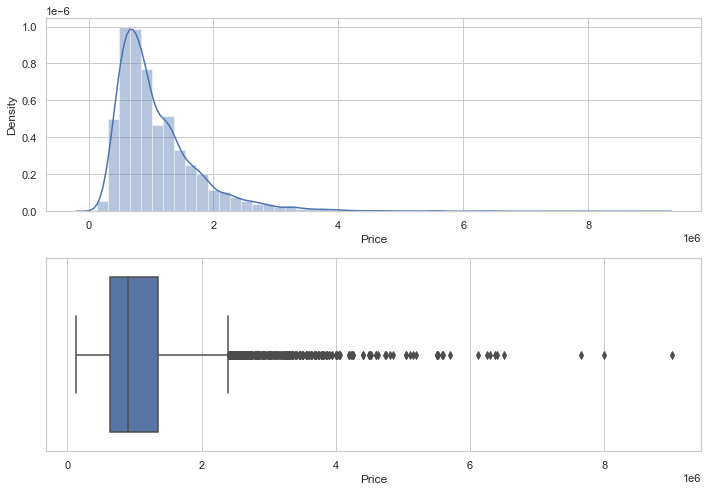

In [61]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['Price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['Price'])
plt.tight_layout()

In [62]:
df.columns.values

array(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype=object)

<AxesSubplot:xlabel='year'>

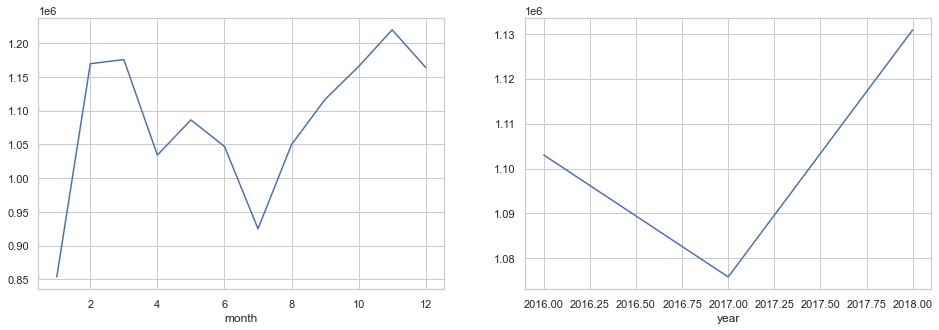

In [63]:
#let's break Date to years, months
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda Date:Date.month)
df['year'] = df['Date'].apply(lambda Date:Date.year)#df visualization house Price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
df.groupby('month').mean()['Price'].plot()
fig.add_subplot(1,2,2)
df.groupby('year').mean()['Price'].plot()

In [64]:
# check if there are any Null values
df.isnull().sum()# drop some unnecessary columns
df = df.drop('Date',axis=1)
df = df.drop('Suburb',axis=1)
df = df.drop('Address',axis=1)
df = df.drop('Type',axis=1)
df = df.drop('CouncilArea',axis=1)
df = df.drop('Regionname',axis=1)
df = df.drop('Method',axis=1)
df = df.drop('SellerG',axis=1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          8887 non-null   int64  
 1   Price          8887 non-null   float64
 2   Distance       8887 non-null   float64
 3   Postcode       8887 non-null   float64
 4   Bedroom2       8887 non-null   float64
 5   Bathroom       8887 non-null   float64
 6   Car            8887 non-null   float64
 7   Landsize       8887 non-null   float64
 8   BuildingArea   8887 non-null   float64
 9   YearBuilt      8887 non-null   float64
 10  Lattitude      8887 non-null   float64
 11  Longtitude     8887 non-null   float64
 12  Propertycount  8887 non-null   float64
 13  month          8887 non-null   int64  
 14  year           8887 non-null   int64  
dtypes: float64(12), int64(3)
memory usage: 1.1 MB


In [66]:
X = df.drop('Price',axis =1).values
y = df['Price'].values#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [67]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

Step 3: Model Selection and Evaluation

Model 1: Multiple Linear Regressions

Multiple Linear Regression is an extension of Simple Linear Regression (read more here) and assume that there is a linear relationship between a dependent variable Y and independent variables X

Let’s wrap the training process in our Regression model:

In [68]:
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)#predicting the test set result
y_pred = regressor.predict(X_test)#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, df.drop('Price',axis =1).columns, columns=['Coefficient']) 
coeff_df

1095561.8162577266
[  97235.15325258 -276856.06769859   83667.4099978    53970.10880082
  113617.58232098   53659.26471556   30553.22283885  210123.21540011
 -173487.54845045 -106312.17895427   66159.76266145   -1665.68934222
   12496.04350576   35070.18010299]


,Coefficient
Rooms,97235.153253
Distance,-276856.067699
Postcode,83667.409998
Bedroom2,53970.108801
Bathroom,113617.582321
Car,53659.264716
Landsize,30553.222839
BuildingArea,210123.215400
YearBuilt,-173487.548450
Lattitude,-106312.178954


<AxesSubplot:ylabel='Density'>

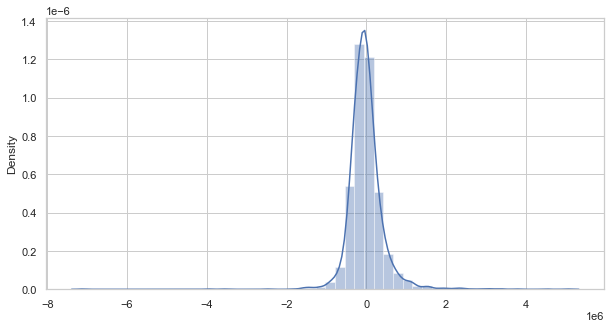

In [69]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

Let’s compare actual output and predicted value to measure how far our predictions are from the real house prices.

In [70]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 285528.05634311173
MSE: 218590841315.92422
RMSE: 467536.9945960685
VarScore: 0.5458875895942983


Model 2: Keras Regressions(ANN)

Let’s create a baseline neural network model for the regression problem. Starting with all of the needed functions and objects.

In [71]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

Since we have 14 features, let’s insert 14 neurons as a start, 4 hidden layers and 1 output layer due to predict house Price.

Also, ADAM optimization algorithm is used for optimizing loss function (Mean squared error)

In [72]:
# having 19 neuron is based on the number of available features
model = Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mae')

Then, we train the model for 400 epochs, and each time record the training and validation accuracy in the history object. To keep track of how well the model is performing for each epoch, the model will run in both train and test data along with calculating the loss function.

In [73]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)
model.summary()

Epoch 1/400
47/47 [==============================] - 1s 9ms/step - loss: 1095560.8750 - val_loss: 1087499.0000
Epoch 2/400
47/47 [==============================] - 0s 4ms/step - loss: 1095554.0000 - val_loss: 1087483.1250
Epoch 3/400
47/47 [==============================] - 0s 5ms/step - loss: 1095508.5000 - val_loss: 1087383.6250
Epoch 4/400
47/47 [==============================] - 0s 5ms/step - loss: 1095267.1250 - val_loss: 1086925.3750
Epoch 5/400
47/47 [==============================] - 0s 4ms/step - loss: 1094361.2500 - val_loss: 1085413.0000
Epoch 6/400
47/47 [==============================] - 0s 5ms/step - loss: 1091811.1250 - val_loss: 1081547.8750
Epoch 7/400
47/47 [==============================] - 0s 5ms/step - loss: 1085862.6250 - val_loss: 1073166.5000
Epoch 8/400
47/47 [==============================] - 0s 5ms/step - loss: 1073803.0000 - val_loss: 1056868.5000
Epoch 9/400
47/47 [==============================] - 0s 5ms/step - loss: 1051600.5000 - val_loss: 1028253.3125
E

<AxesSubplot:>

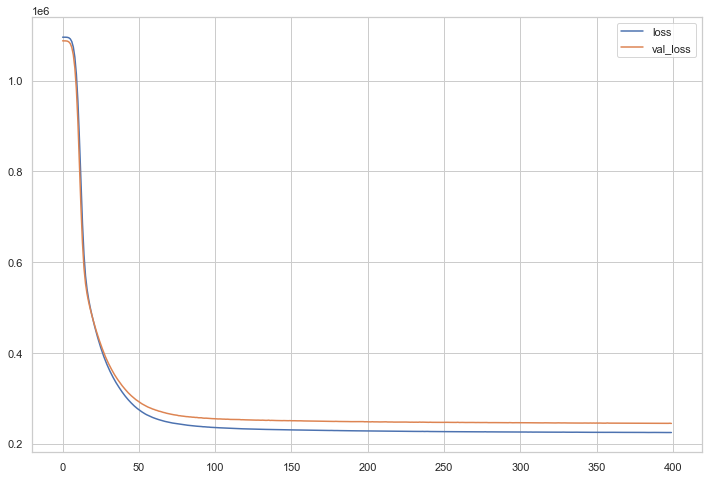

In [74]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

Evaluation on Test Data

MAE: 244361.73343206613
MSE: 234781804181.43497
RMSE: 484542.88167450664
VarScore: 0.5137503028177924


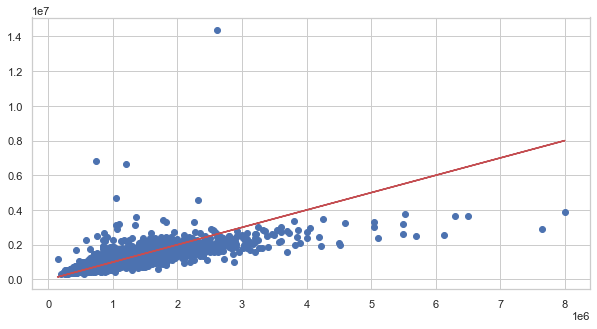

In [75]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

<AxesSubplot:ylabel='Density'>

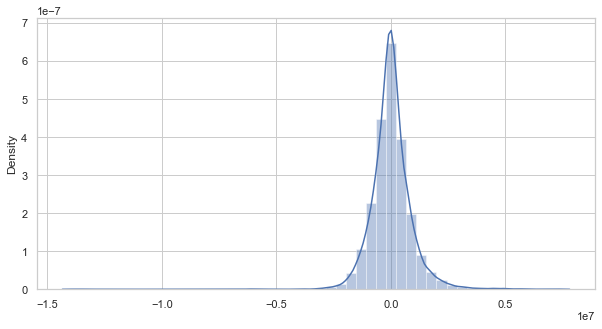

In [76]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

Multiple Linear Regression vs Keras Regression(ANN) Same Same with 50% difference

# reference


https://github.com/Prajwal10031999/House-Price-Prediction-with-ANN/blob/main/house-price-prediction-with-ann.ipynb

https://towardsdatascience.com/house-prices-prediction-using-deep-learning-dea265cc3154


https://www.kaggle.com/tomasmantero/predicting-house-prices-keras-ann